<a href="https://colab.research.google.com/github/JCK07115/IntroML/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1

### Question 1



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 1.0, 'Euclidean, Error rate versus Model capacity')

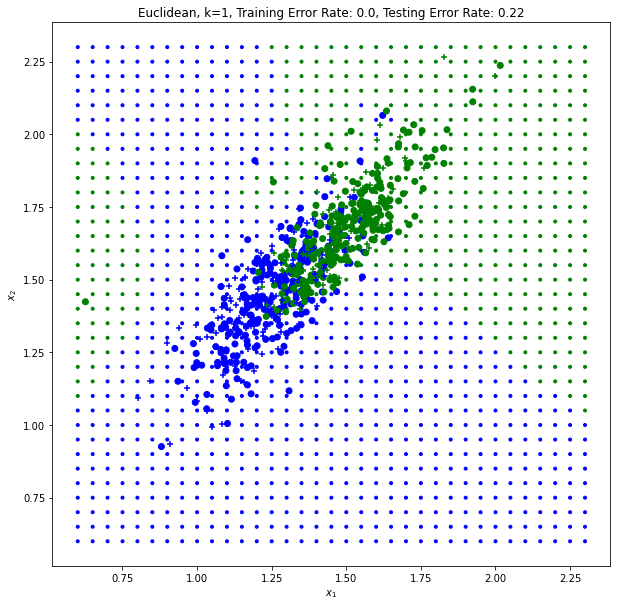

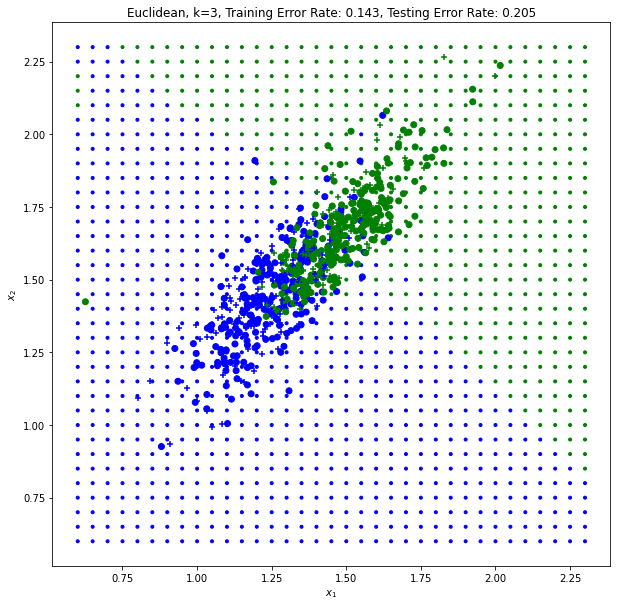

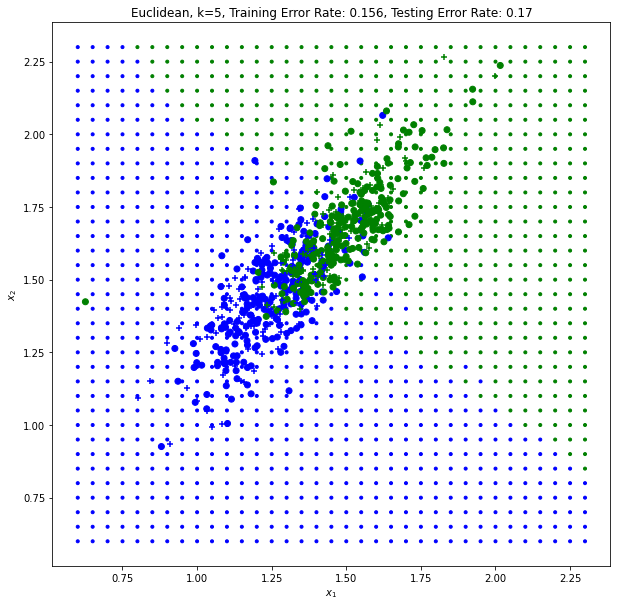

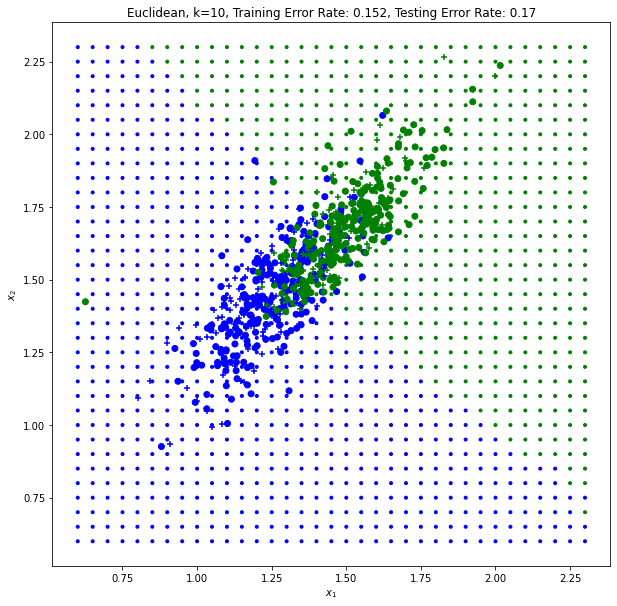

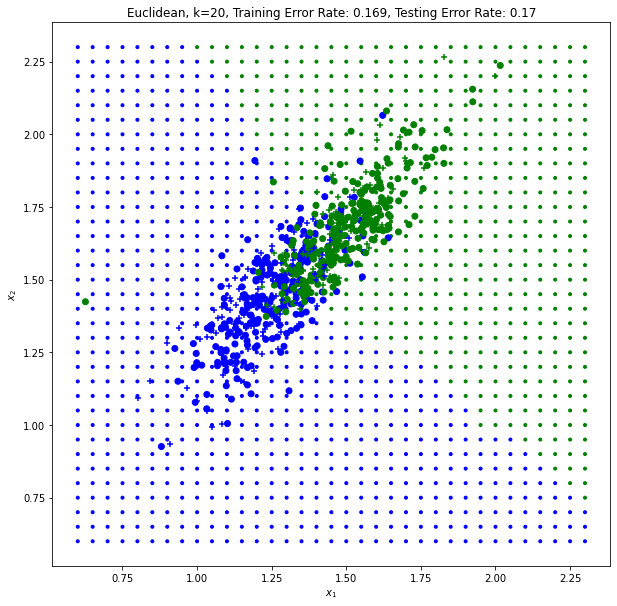

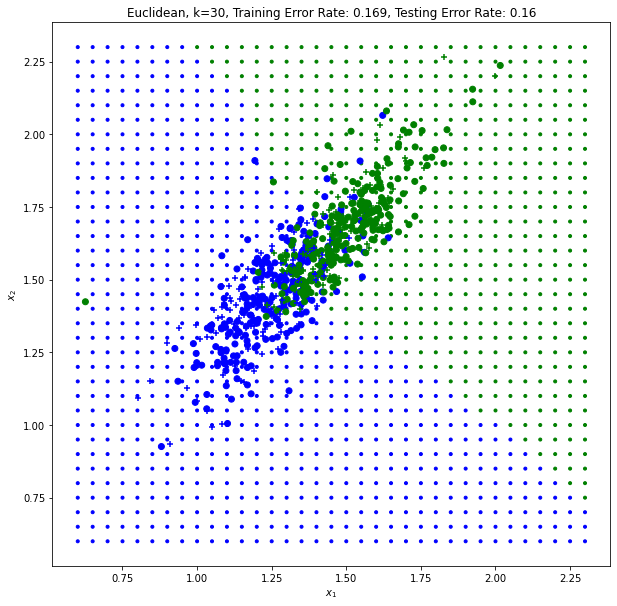

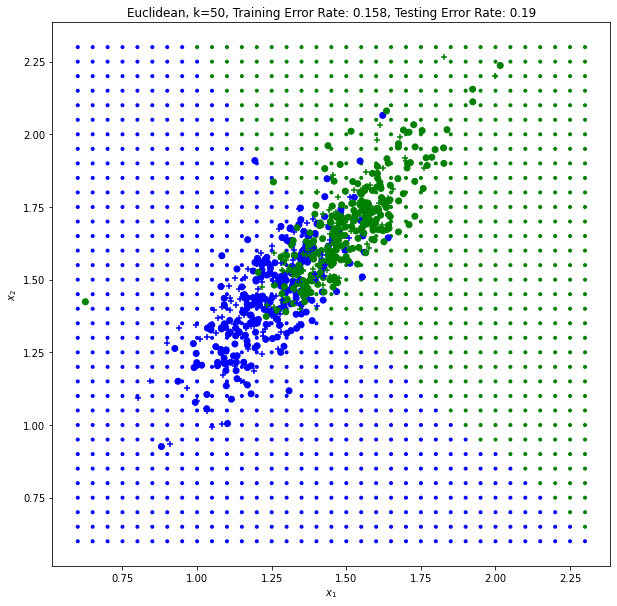

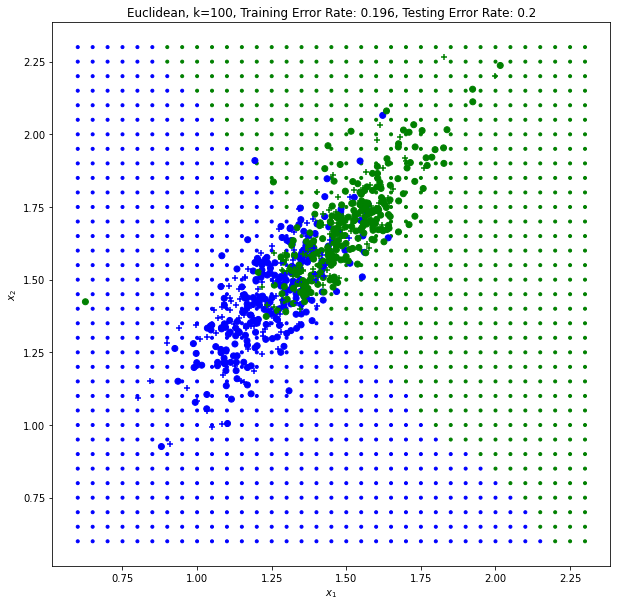

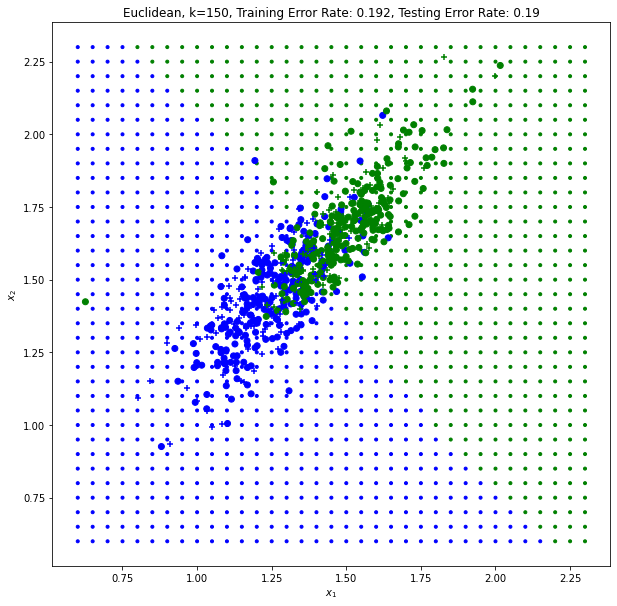

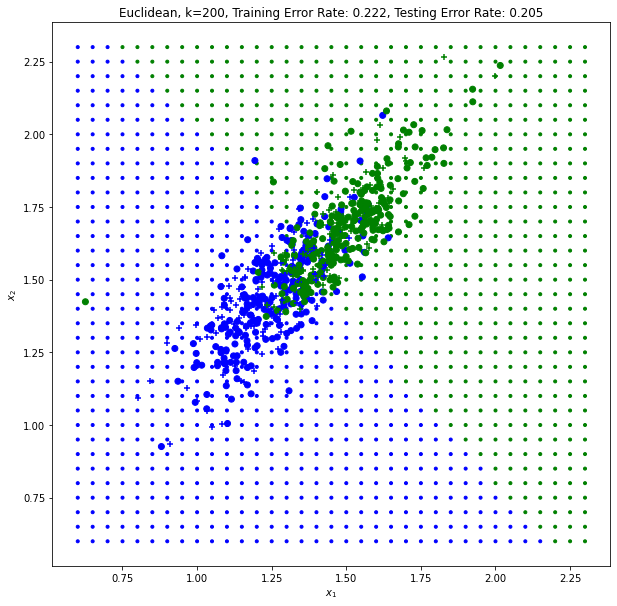

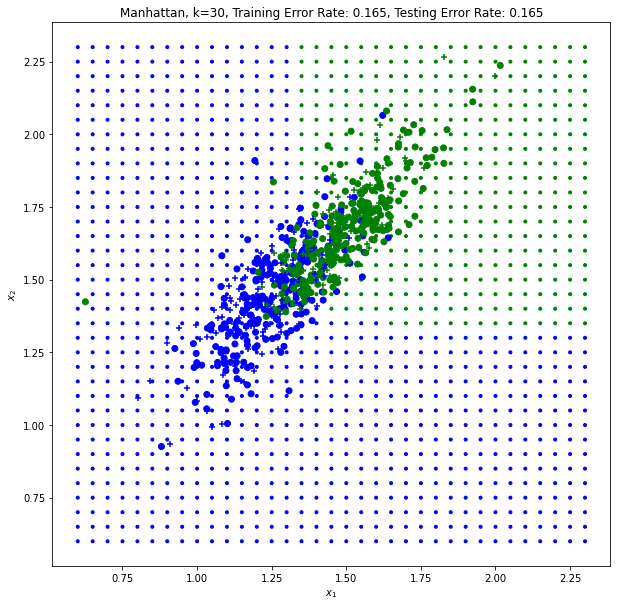

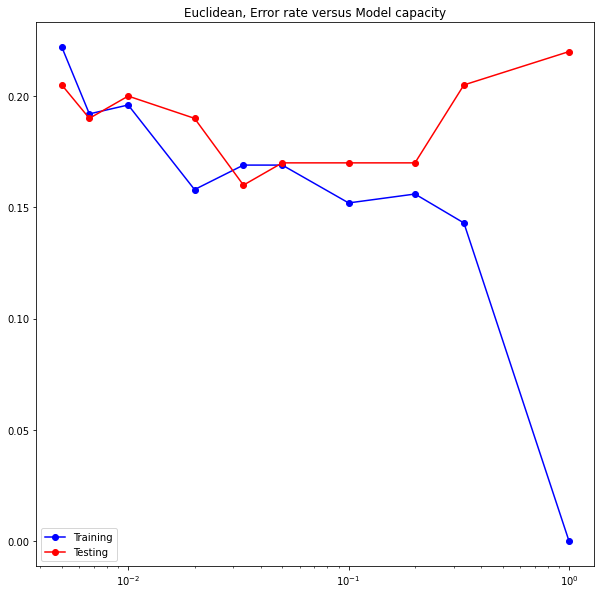

In [26]:
# creating the training datasets
train_DAT = pd.read_csv('./data/train.sDAT.csv', header=None)
train_DAT.rename(columns={0: "x1", 1: "x2"}, inplace=True)
train_DAT['label'] = 1

train_NC = pd.read_csv('./data/train.sNC.csv', header=None)
train_NC.rename(columns={0: "x1", 1: "x2"}, inplace=True)
train_NC['label'] = 0

# merging the two training datasets
train_df = pd.concat([train_DAT, train_NC], axis=0)

# creating the test datasets
test_DAT = pd.read_csv('./data/test.sDAT.csv', header=None)
test_DAT.rename(columns={0: "x1", 1: "x2"}, inplace=True)
test_DAT['label'] = 1

test_NC = pd.read_csv('./data/test.sNC.csv', header=None)
test_NC.rename(columns={0: "x1", 1: "x2"}, inplace=True)
test_NC['label'] = 0

# merging the two testing datasets
test_df = pd.concat([test_DAT, test_NC], axis=0)

grid_points = pd.read_csv('./data/2D_grid_points.csv', header=None)
grid_points.rename(columns={0: "x1", 1: "x2"}, inplace=True)

k = [1, 3, 5, 10, 20, 30, 50, 100, 150, 200]
colors = {0: 'green', 1: "blue"}
train_err_list = []
test_err_list = []
manhattan_test_err = []
manhattan_train_err = []
capacity = []
for i in k:
    capacity.append(1 / i)


# function to draw the classification plot and calculate the error rates
def generate_plot(k, metric):
    if metric == "Euclidean":
        p = 2
    elif metric == "Manhattan":
        p = 1

    neigh = KNeighborsClassifier(n_neighbors=k, p=p)
    neigh.fit(train_df[['x1', 'x2']], train_df['label'])

    # calculate the error rates and store it
    train_err = round(
        1 - neigh.score(train_df[['x1', 'x2']], train_df['label']), 3)
    test_err = round(1 - neigh.score(test_df[['x1', 'x2']], test_df['label']),
                     3)
    if p == 2:
        train_err_list.append(train_err)
        test_err_list.append(test_err)
    elif p == 1:
        manhattan_test_err.append(test_err)
        manhattan_train_err.append(train_err)

    grid_points_copy = grid_points.copy()
    grid_points_copy['predict'] = neigh.predict(grid_points)

    # draw the plot
    _, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(grid_points_copy['x1'],
               grid_points_copy['x2'],
               c=grid_points_copy['predict'].map(colors),
               marker='.')
    ax.scatter(train_df['x1'],
               train_df['x2'],
               c=train_df['label'].map(colors),
               marker='o')
    ax.scatter(test_df['x1'],
               test_df['x2'],
               c=test_df['label'].map(colors),
               marker='+')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title(metric + ", k=" + str(k) + ", Training Error Rate: " +
                 str(train_err) + ", Testing Error Rate: " + str(test_err))


# draw the plots for all k's
for i in k:
    generate_plot(i, "Euclidean")

# find the k-value with the lowest testing error rate
min_test_err = min(test_err_list)
min_err_ind = [i for i, j in enumerate(test_err_list) if j == min_test_err]
generate_plot(k[min_err_ind[0]], "Manhattan")

# compare the testing error rate between Euclidean and Manhattan
train_list = []
test_list = []
metric = ""
if min_test_err <= manhattan_test_err:
    train_list = train_err_list
    test_list = test_err_list
    metric = "Euclidean"
else:
    manhattan_test_err = []
    for i in k:
        generate_plot(i, "Manhattan")
    train_list = manhattan_train_err
    test_list = manhattan_test_err
    metric = "Manhattan"

# draw the Error rate versus Model capacity plot
_, err_plot = plt.subplots(figsize=(10, 10))
err_plot.plot(capacity, train_list, 'o-r', color='blue', label='Training')
err_plot.plot(capacity, test_list, 'o-r', color='red', label='Testing')
err_plot.set_xscale("log")
err_plot.legend()
err_plot.set_title(metric + ", Error rate versus Model capacity")


# The classification performance of the trained classifiers

### kNN classifiers using the Euclidean distance metric

<table>
<tr><th>k<th><th>Hi1</th></tr>
<tr><td>Hi<td><td>Hi1</td></tr>
</table>

In [ ]:
k-


##Question 4##
